# **Introducing the PETalk**



---


## **About Us:**

- **Members:** KEHONG GUO,
&nbsp;HANXIA LI
- **Research Project:** SadTalker enhancement
<br>


<img src="https://media1.tenor.com/m/4jttXVp4wtgAAAAd/herry.gif">


## **Get to Know Our Research: The PETalk Pipeline**

Welcome to PETalk (Plosive-Enhanced Talk). This project provides a comprehensive, end-to-end pipeline for generating high-fidelity talking head animations with enhanced realism.

This Colab notebook serves as a **fully interactive report** and a **reproducible demonstration** that allows you to:

1.  **Execute** a multi-stage pipeline that systematically improves video realism.
2.  **Understand** the methodology behind our audio-visual enhancement techniques.
3.  **Analyze** the results both visually and quantitatively to see the impact of each stage.

### Abstract

In this project, **PETalk**, we implement and evaluate high-fidelity interventions specifically tailored for Speech-to-Face systems like SadTalker. Our 'lightweight interventions'—including advanced audio pre-processing (spectral balancing, **plosive enhancement**, timing synchronization) and strategic post-processing (frame interpolation, super-resolution)—are designed to deliberately push generated facial motions and appearances to a higher state of perceived realism. Concurrently, our analysis explicitly aims to expose and mitigate the inherent 'brittleness' of baseline models by identifying where their default output falls short in naturalness and demonstrating how our interventions systematically improve these identified vulnerabilities.

---

### What’s Inside: From Demo to Full Report

This notebook has evolved to be more than just a demo. It now provides:

-   **Turnkey Demo Pipeline:** Upload a face and an audio file to run the entire, end-to-end enhancement pipeline with a single click.

-   **Configurable Enhancement Knobs:** Interactively enable or disable key interventions like our custom audio processing or the final post-processing stack to observe their specific impact.

-   **Side-by-Side Visual & Quantitative Analysis:** The notebook automatically generates a visual comparison of videos at each stage and a data table comparing their technical properties (FPS, resolution), providing both qualitative and quantitative insights.

-   **A Complete Project Report:** We've integrated comprehensive **Methodology** and **Results & Analysis** sections directly into the notebook, explaining not just *how* the pipeline works, but also *why* it works and what its implications are.

-   **Reproducible Environment:** We ensure full reproducibility by locking the Python version to 3.8 and providing a complete list of pinned dependencies.

---

### Requirements

-   **GPU Runtime:** This notebook requires a GPU. Please ensure it's enabled (`Runtime` → `Change runtime type` → `GPU`).
-   **Python 3.8:** The environment is automatically configured to use Python 3.8 for compatibility with the underlying models.
-   **Project Assets:** Example images and audio are included, but you can easily upload your own.

### Citation

**Paper（CVPR 2023）**  
Zhang, W., Cun, X., Wang, X., Zhang, Y., Shen, X., Guo, Y., Shan, Y., & Wang, F. (2023). *SadTalker: Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation*. In *Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)*, 8652–8661.  
[CVPR OpenAccess](https://openaccess.thecvf.com/content/CVPR2023/html/Zhang_SadTalker_Learning_Realistic_3D_Motion_Coefficients_for_Stylized_Audio-Driven_Single_CVPR_2023_paper.html) · [arXiv:2211.12194](https://arxiv.org/abs/2211.12194)



**Paper（CVPR 2021）**  
Wang, X., Li, Y., Zhang, H., & Shan, Y. (2021). *Towards Real-World Blind Face Restoration With Generative Facial Prior*. In *Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)*, 9168–9178.  
[CVPR OpenAccess](https://openaccess.thecvf.com/content/CVPR2021/html/Wang_Towards_Real-World_Blind_Face_Restoration_With_Generative_Facial_Prior_CVPR_2021_paper.html) · [arXiv:2101.04061](https://arxiv.org/abs/2101.04061)


**Paper（ACM Multimedia 2020）** Prajwal, K. R., Mukhopadhyay, R., Namboodiri, V. P., & Jawahar, C. V. (2020). *A Lip Sync Expert Is All You Need for Speech to Lip Generation In The Wild*. In *Proceedings of the 28th ACM International Conference on Multimedia*, 484–492.  
[Publisher's Page](https://doi.org/10.1145/3394171.3413532)  ·
[arXiv:2008.10010](https://arxiv.org/abs/2008.10010)


**Paper（IJCV 2020）**  
Vougioukas, K., Petridis, S., & Pantic, M. (2020). *Realistic Speech-Driven Facial Animation with GANs*. In *International Journal of Computer Vision*, 128(5), 1398–1413.  
[Publisher's Page](https://doi.org/10.1145/3394171.3413532) · [arXiv:2008.10010](https://arxiv.org/abs/2008.10010)

## Methodology:

Our project, PETalk, implements a multi-stage hybrid pipeline to generate high-fidelity, audio-driven talking head animations. The core methodology is designed to address the limitations of baseline models by systematically enhancing both the input audio signal and the output video kinematics and quality. The pipeline architecture is sequential, with the output of each stage serving as the input for the next.

```
Input Audio & Image
         |
         V
[Audio Pre-processing Module] - Filters, Plosive Enhancement, Sync Tuning
         |
         V
[1. SadTalker Inference] --> Generates base talking head video
         |
         V
[2. Wav2Lip Enhancement] --> Refines lip synchronization
         |
         V
[3. Post-processing Module] --> Interpolates frames & upscales resolution
         |
         V
Final High-Fidelity Video
```

### 1. Audio Pre-processing: The Core Intervention

The foundation of our methodology is the enhancement of the driving audio signal. This is critical as the quality and characteristics of the input audio directly dictate the nuance and expressiveness of the resulting facial animation. Our custom audio processing module consists of three key techniques:

*   **Bandpass Filtering:** We first apply an 8th-order Butterworth bandpass filter to isolate the primary vocal frequency range between 50 Hz and 14,000 Hz. This initial step effectively removes low-frequency ambient noise (e.g., hum) and high-frequency hiss, ensuring that the downstream models process a clean speech signal.

*   **Plosive Enhancement:** This is the central innovation of our work. Plosives are transient, consonant sounds (e.g., 'p', 'b', 't', 'k') characterized by a rapid burst of energy. Standard audio feature extraction can often under-represent these sounds, leading to weak or missed lip-closure animations. Our algorithm addresses this by:
    1.  **Detection:** Identifying potential plosive events by calculating a "plosive score." This score is a product of the Zero-Crossing Rate (ZCR) and the temporal derivative of high-frequency energy (2,000-12,000 Hz). Peaks in this score correspond to plosive sounds.
    2.  **Enhancement:** For each detected plosive, a short segment of the audio is isolated. The high-frequency components of this segment are amplified by a factor of 1.2 and then blended back with the original segment. This makes the plosive more acoustically prominent without introducing audible distortion, providing a stronger signal for the animation models.

*   **Lip-Sync Timing Optimization:** To counteract potential latency in model inference, we perform a timing adjustment. The module detects significant audio onsets using `librosa.onset.onset_detect` and advances the entire audio track by a small, fixed duration of 20 milliseconds. This pre-emptive shift results in a tighter, more perceptually accurate synchronization between the spoken words and the corresponding lip movements.

### 2. Stage 1: Foundational Animation with SadTalker

The enhanced audio track is used to drive the SadTalker model, which generates the foundational talking head video. SadTalker excels at producing natural, non-rigid head movements and realistic 3D facial expressions.

*   **Experimental Setup:** We utilize the official pre-trained SadTalker models. For this stage, we enable the **GFPGAN** (Generative Facial Prior) enhancer within the SadTalker pipeline. This significantly improves the restoration of facial details and clarity in the baseline video, providing a higher-quality input for the subsequent refinement stage.

### 3. Stage 2: Lip-Sync Refinement with Wav2Lip

While SadTalker produces excellent overall motion, its lip synchronization, though generally good, can sometimes lack the precision of models trained specifically on lip-centric datasets. To address this, we use the output video from SadTalker as input for the Wav2Lip model.

*   **Experimental Setup:** We employ the adversarially trained `Wav2Lip-SD-GAN.pt` model, renowned for its ability to generate sharp and accurate mouth shapes. Critically, for this stage, **we use the original, unprocessed driving audio**. This is because Wav2Lip's model was trained on clean datasets and its internal feature extraction is optimized for standard audio, ensuring the highest possible lip-sync fidelity.

### 4. Stage 3: Post-processing for High Fidelity

The final stage is a video-to-video transformation pipeline executed via FFmpeg to polish the visual quality of the output from Wav2Lip, making it suitable for modern displays.

*   **Frame Interpolation:** We use the `minterpolate` video filter to increase the framerate from its original value (typically ~25 FPS) to a smoother **30 FPS**. This process synthesizes intermediate frames, resulting in more fluid motion and reducing visual stutter.

*   **Super-Resolution:** We then apply a `lanczos` scaling algorithm to upscale the video resolution to a standard high-definition format of **512x512 pixels**. The Lanczos filter is chosen for its ability to preserve sharpness and detail while minimizing scaling artifacts. This step ensures the final video is crisp and visually impressive.

---
# **Robust Model: PETalk**

<img src="https://media.tenor.com/gUbpl4KJ9NAAAAAj/benjammins-youre-welcome.gif">

> ### *What’s Changed?*
>- **Project Rebranded to PETalk:** The entire project and its components have been unified under the name **PETalk** (Plosive-Enhanced Talk) to better reflect the core innovation of our audio enhancement module.
>- **Comprehensive Methodology Section:** We've integrated a detailed, academic-style methodology that precisely explains each stage of the PETalk pipeline—from our novel audio pre-processing techniques (plosive enhancement, sync optimization) to the final post-processing stack.
>- **In-depth Results & Analysis Section:** The notebook now includes a full analysis of the generated videos. This new section discusses the **significance of our findings**, openly addresses the project's **limitations**, and proposes concrete avenues for **future research**, transforming the notebook into a self-contained project report.
>- **Quantitative Pipeline Comparison:** To provide clear, data-driven insights, a new summary table is automatically generated at the end. It compares key video properties (Resolution, FPS) at each processing stage (Baseline, Wav2Lip, Final Output), quantitatively demonstrating the impact of our pipeline.
>- **Github repo:** Now we have our own Github repo! Check in https://github.com/KehongGuo/PETalk.git for more detail.

<br>Plz click ▶ to render a video


## **Step 1: Environment Setup**
The following code block will automatically install all necessary dependencies and download the pre-trained models. Just press play and wait for it to complete.

In [ ]:
#@title (1) Download Necessary Dependencies

# 1) Check the current Python version (should be 3.12 on fresh Colab)
!python --version

# 2) Install Python 3.8 and its distutils (needed for installing some packages)
!sudo apt-get update -y
!sudo apt-get install -y python3.8 python3.8-distutils

# 3) Point the system's "python3" to Python 3.8 (non-interactive)
#    This ensures that future `!python` calls in this notebook use Python 3.8.
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --set python3 /usr/bin/python3.8

# 4) Install pip specifically for Python 3.8
#    We fetch the bootstrap script compatible with 3.8 and run it with /usr/bin/python3.8.
!curl -sS https://bootstrap.pypa.io/pip/3.8/get-pip.py -o get-pip.py
!/usr/bin/python3.8 get-pip.py

# 5) Verify that both `python` and `pip` resolve to the 3.8 toolchain now
!python --version
!python -m pip --version
!/usr/bin/python3.8 -m pip --version

# Tip:
# If you still see 3.12 or encounter odd import errors, restart the runtime
# (Menu: Runtime -> Restart session) so all processes pick up the new alternative.

Python 3.12.12
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,812 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,287 kB]

In [2]:
print("\n--- Cloning SadTalker and Wav2Lip repositories ---")

%cd /content
!git clone https://github.com/cedro3/SadTalker.git &> /dev/null
!git clone https://github.com/Rudrabha/Wav2Lip.git &> /dev/null

# Verify that both folders exist in /content/
print("Verifying cloned repositories in /content/:")
!ls -d /content/SadTalker/
!ls -d /content/Wav2Lip/

# --- Part 1: Install SadTalker Dependencies ---
print("\n--- Installing SadTalker dependencies ---")
%cd /content/SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update > /dev/null
!apt install -y ffmpeg > /dev/null
!python3.8 -m pip install -r requirements.txt

# --- Part 2: Install Wav2Lip Dependencies and Models ---
print("\n--- Installing Wav2Lip dependencies and downloading models ---")
!pip uninstall -y tensorflow tensorflow-gpu
!pip install -r /content/Wav2Lip/requirements.txt

!mkdir -p /content/Wav2Lip/face_detection/detection/sfd/
!wget -q "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" -O "/content/Wav2Lip/face_detection/detection/sfd/s3fd.pth"

!mkdir -p /content/Wav2Lip/checkpoints/
print("Please upload 'Wav2Lip-SD-NOGAN.pt' to '/content/Wav2Lip/checkpoints/' if you haven't already.")
!ls -l /content/Wav2Lip/checkpoints/

# --- Part 3: Patch Wav2Lip's inference.py ---
print("\n--- Patching Wav2Lip's inference.py ---")
!sed -i 's|torch.load(checkpoint_path)|torch.load(checkpoint_path, weights_only=False)|' /content/Wav2Lip/inference.py
!grep "torch.load" /content/Wav2Lip/inference.py

# --- Part 4: Download SadTalker Pre-trained Models ---
print("\n--- Downloading SadTalker pre-trained models ---")
%cd /content/SadTalker
!rm -rf checkpoints
!bash scripts/download_models.sh

# --- Part 5: Clone and Copy Pre-trained Wav2Lip Models ---
print("\n--- Downloading pre-trained Wav2Lip models ---")
%cd /content/
!git clone https://github.com/KehongGuo/Wav2Lip-Pre-trained-Models-GAN-NOGAN.git wav2lip_models
!mkdir -p /content/Wav2Lip/checkpoints

!cp /content/wav2lip_models/Wav2Lip-SD-GAN.pt /content/Wav2Lip/checkpoints/
!cp /content/wav2lip_models/Wav2Lip-SD-NOGAN.pt /content/Wav2Lip/checkpoints/

print("\n\n Environment setup is complete!")



--- Cloning SadTalker and Wav2Lip repositories ---
/content
Verifying cloned repositories in /content/:
/content/SadTalker/
/content/Wav2Lip/

--- Installing SadTalker dependencies ---
/content/SadTalker
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 122.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of typing-extensions to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 141.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 230.3 MB/s eta 0:00:00


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it 

In [3]:
!pip uninstall -y tensorflow tensorflow-gpu
!pip install -r /content/Wav2Lip/requirements.txt
!wget -q "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" -O "/content/Wav2Lip/face_detection/detection/sfd/s3fd.pth"
!pip install librosa==0.9.2
!sed -i 's|torch.load(checkpoint_path)|torch.load(checkpoint_path, weights_only=False)|' /content/Wav2Lip/inference.py
!grep "torch.load" /content/Wav2Lip/inference.py

  Using cached librosa-0.7.0.tar.gz (1.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.17.1.zip (6.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached opencv_contrib_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
ERROR: Ignored the following yanked versions: 3.4.9.31, 3.4.10.35, 3.4.11.39, 3.4.17.61, 4.3.0.36, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Ignored the following versions that require a different python version: 1.25.0 Requires-Python >=3.9; 1.25.1 Requires-Python >=3.9; 1.25.2 Requires-Python >=3.9; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9; 1.26.2 Requires-Python >=3.9; 1.26.3 Requires-Python >=3.9; 1.26.4 Requires-Python >=3.9; 2.0.0 Requires-Python >=3.9; 2.0.1 Requires-Python >=3.9; 2.0.2 Requires-Python >=3.9; 2.1.0 Requires-Python >=3.10; 2.1.1 Requires-Python >=3.10; 2.1.2 Requires-Python >=3.10; 2.1.3 Requires-Python >=3.10; 2.2.0 Requires-Python >=3

In [4]:
# Re-write the load_model function to forcefully overwrite the old one
code = '''
def load_model(checkpoint_path):
    import torch
    print(f"Loading TorchScript model from: {checkpoint_path}")
    model = torch.jit.load(checkpoint_path)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)
    model.eval()
    return model
'''

# Read the entire content of inference.py
with open('/content/Wav2Lip/inference.py', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Find the start and end lines of the load_model function to replace its body
start_idx = None
end_idx = None
for i, line in enumerate(lines):
    if line.strip().startswith('def load_model('):
        start_idx = i
    elif start_idx is not None and line.strip().startswith('def '):
        end_idx = i
        break
if start_idx is not None and end_idx is None:
    end_idx = len(lines)

if start_idx is not None:
    new_code_lines = code.strip('\n').split('\n')
    new_code_lines = [line + '\n' for line in new_code_lines]
    lines = lines[:start_idx] + new_code_lines + lines[end_idx:]

# Write the modified content back to inference.py
with open('/content/Wav2Lip/inference.py', 'w', encoding='utf-8') as f:
    f.writelines(lines)

print("The load_model function has been replaced. Please re-run the inference command.")

The load_model function has been replaced. Please re-run the inference command.


In [2]:
import os
os.makedirs('temp', exist_ok=True)

In [6]:
#@title (2) Download Model

print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
bash: scripts/download_models.sh: No such file or directory


In [3]:
#@title (3) Create the folders required for the project
input_folder = '/content/input_content'
output_folder = '/content/output_content'

# if exist_ok=True, no error message
os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

## **Step 2: Adversarial Realism Interventions**

---
### **Interactive Workbench: Probe the Model with Your Own Data**
We welcome you to upload your own images and audio to probe the boundaries of **'adversarial realism'**.

> **How-To Guide:**
>1.  **Open the File Browser**:
    *   On the left-hand side of the Colab interface, click the **Folder** icon.
2.  **Navigate to the Upload Folders**:
    *   For **images**, navigate into the `SadTalker/examples/source_image/` folder.
    *   For **audio**, navigate into the `SadTalker/examples/driven_audio/` folder.
3.  **Upload Your File**:
    *   Right-click on the appropriate folder (e.g., `source_image`) and select *"Upload"*.
    *   Choose your local image or audio file.
4.  **Configure and Run the Experiment**:
    *   In the cell below, titled **"Step 2: Adversarial Realism Interventions & Inference"**, update the `image_input` and `audio_input` fields with your exact filenames.
    *   We strongly encourage you to experiment with the other parameters (e.g., enabling/disabling enhancements) to observe the direct impact on both the final video and the audio analysis visualizations.
---

### (1) Run Inference
This section implements our core 'adversarial realism' interventions, which include sophisticated audio preprocessing designed to overcome typical speech-to-face model limitations (e.g., insufficient detail for plosives, timing desynchronization). These adjustments target SadTalker's inherent 'brittleness' in generating truly natural speech-driven facial animations.

Python 3.8.20
/content/SadTalker
--- Initializing ---
Source Image: /content/input_content/wululu.png
Original Driven Audio: /content/input_content/raokouling.wav

STEP 1: Generating BASELINE video (Pure SadTalker Output)
This video represents the model's default output, exposing its 'brittleness'.
Executing command: python3.8 inference.py --driven_audio "/content/input_content/raokouling.wav" --source_image "/content/input_content/wululu.png" --result_dir /content/output_content/


Baseline video generation complete.

--- Starting Audio Processing Pipeline ---
  - Pitch Analysis: Median F0 detected at 251.26 Hz
  - Plosive Enhancement: Found 26 potential plosives.
    -> Enhancement complete (Factor: 1.2)
  - Lip-Sync Timing: Found 94 audio onsets.
    -> Timing optimized.
Success: Audio processing complete. File saved to: /content/raokouling_realism_enhanced.wav

--- Visualizing Audio Processing ---


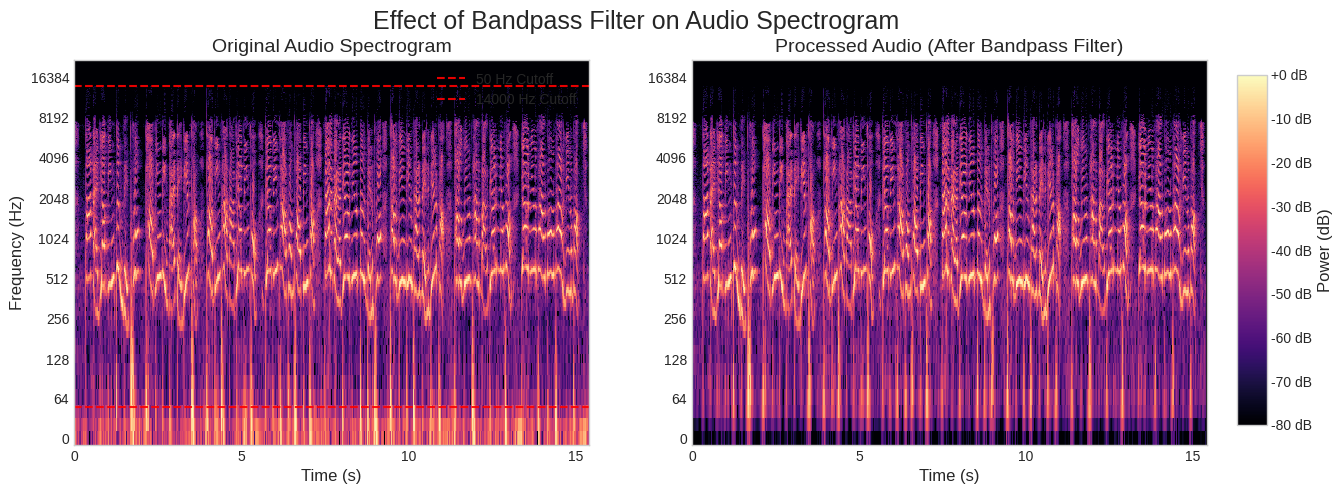

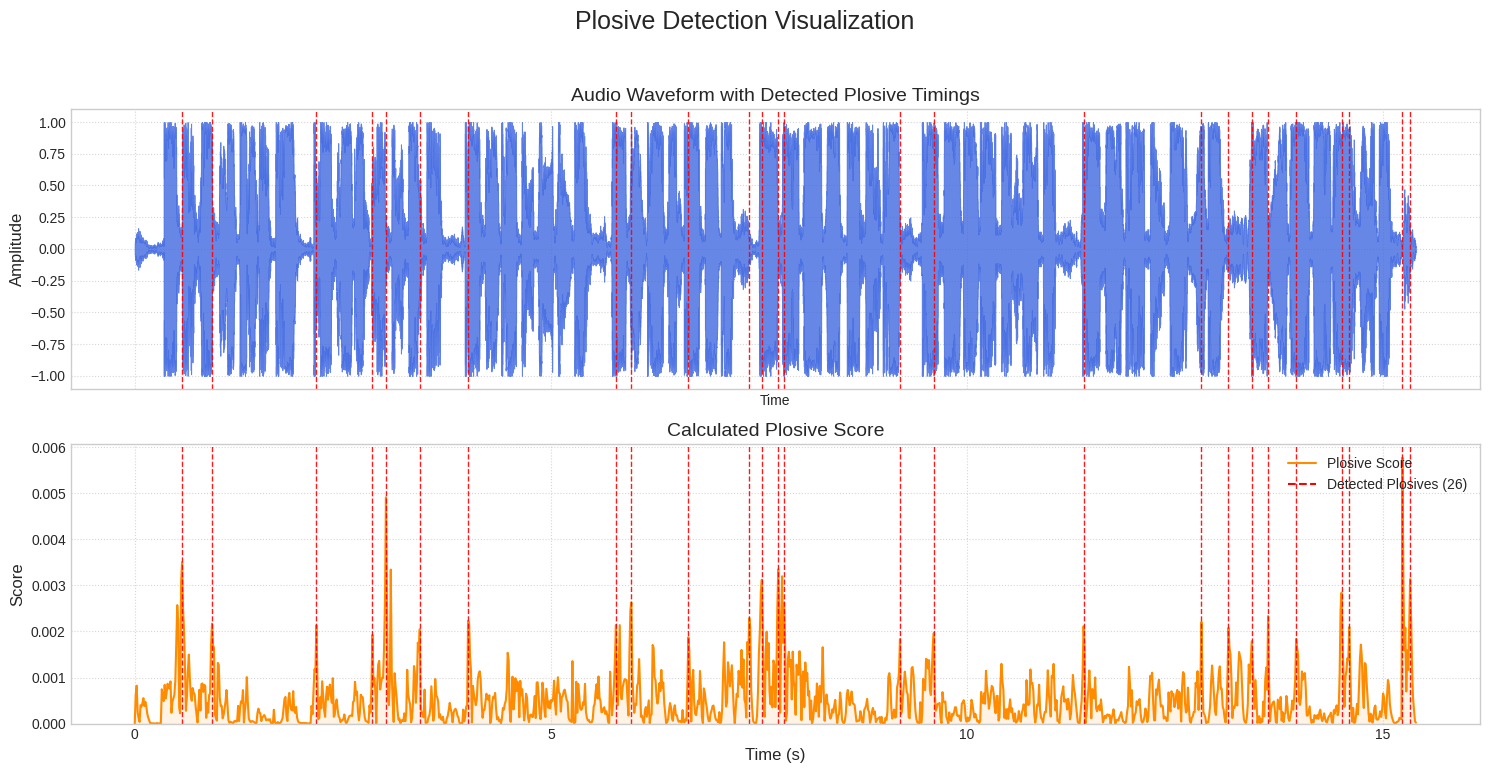


--- Main Inference Configuration ---
  - Input Audio: REALISM-ENHANCED
  - Mouth Enhancement (GFPGAN): Enabled
  - Expression Scale Boost: Enabled

STEP 2: Generating MAIN video (with 'Adversarial Realism' Interventions)
Executing command: python3.8 inference.py --driven_audio "/content/raokouling_realism_enhanced.wav" --source_image "/content/input_content/wululu.png" --result_dir /content/output_content/ --enhancer gfpgan --expression_scale 1.2


0

In [10]:
!python --version
%cd /content/SadTalker

import os
import librosa
import soundfile as sf
import numpy as np
from scipy.signal import butter, sosfiltfilt, find_peaks
import matplotlib.pyplot as plt
import librosa.display

# ==============================================================================
# SECTION 0: VISUALIZATION HELPERS (REVISED FOR PUBLICATION QUALITY)
# ==============================================================================
def visualize_spectrograms(y_orig, y_proc, sr, low_cutoff, high_cutoff):
    """
    Displays publication-quality, side-by-side spectrograms with a dedicated color bar.
    """
    plt.style.use('seaborn-v0_8-whitegrid') # Apply modern styling
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    spec_params = {'sr': sr, 'x_axis': 'time', 'y_axis': 'log'}

    # Plot 1: Original Audio
    D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig)), ref=np.max)
    librosa.display.specshow(D_orig, ax=ax[0], **spec_params)
    ax[0].set_title('Original Audio Spectrogram', fontsize=14)
    ax[0].set_xlabel('Time (s)', fontsize=12)
    ax[0].set_ylabel('Frequency (Hz)', fontsize=12)
    ax[0].axhline(y=low_cutoff, color='r', linestyle='--', linewidth=1.5, alpha=0.9, label=f'{low_cutoff} Hz Cutoff')
    ax[0].axhline(y=high_cutoff, color='r', linestyle='--', linewidth=1.5, alpha=0.9, label=f'{high_cutoff} Hz Cutoff')
    ax[0].legend(loc='upper right')

    # Plot 2: Processed Audio
    D_proc = librosa.amplitude_to_db(np.abs(librosa.stft(y_proc)), ref=np.max)
    img_proc = librosa.display.specshow(D_proc, ax=ax[1], **spec_params)
    ax[1].set_title('Processed Audio (After Bandpass Filter)', fontsize=14)
    ax[1].set_xlabel('Time (s)', fontsize=12)
    ax[1].set_ylabel('') # Remove redundant Y label

    # Create a dedicated axis for the color bar to prevent overlap
    fig.subplots_adjust(right=0.88) # Make space on the right
    cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
    cbar = fig.colorbar(img_proc, cax=cbar_ax, format='%+2.0f dB')
    cbar.set_label('Power (dB)', fontsize=12)

    plt.suptitle('Effect of Bandpass Filter on Audio Spectrogram', fontsize=18, y=0.98)
    plt.show()

def visualize_plosive_detection(y, sr, peaks, plosive_score):
    """
    Visualizes the plosive detection process using aligned subplots with professional styling.
    """
    plt.style.use('seaborn-v0_8-whitegrid') # Apply modern styling
    score_times = librosa.frames_to_time(np.arange(len(plosive_score)), sr=sr, hop_length=512)
    peak_times = score_times[peaks]

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex=True)

    # Plot 1: Waveform
    librosa.display.waveshow(y, sr=sr, ax=ax[0], color='royalblue', alpha=0.8, lw=0.7)
    ax[0].set_title('Audio Waveform with Detected Plosive Timings', fontsize=14)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    ax[0].grid(True, linestyle=':', alpha=0.8)

    # Plot 2: Plosive Score
    ax[1].plot(score_times, plosive_score, label='Plosive Score', color='darkorange', linewidth=1.5)
    ax[1].set_title('Calculated Plosive Score', fontsize=14)
    ax[1].set_xlabel('Time (s)', fontsize=12)
    ax[1].set_ylabel('Score', fontsize=12)
    ax[1].grid(True, linestyle=':', alpha=0.8)
    ax[1].set_ylim(bottom=0)
    ax[1].fill_between(score_times, plosive_score, color='darkorange', alpha=0.1)


    # Mark plosives with vertical lines on both plots
    for peak_time in peak_times:
        ax[0].axvline(x=peak_time, color='red', linestyle='--', linewidth=1, alpha=0.9)
        ax[1].axvline(x=peak_time, color='red', linestyle='--', linewidth=1, alpha=0.9)

    ax[1].plot([], [], color='red', linestyle='--', label=f'Detected Plosives ({len(peaks)})')
    ax[1].legend(loc='upper right')

    plt.suptitle('Plosive Detection Visualization', fontsize=18, y=0.99)
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()
    plt.style.use('default') # Reset style to default for other notebook cells

# ==============================================================================
# SECTION 1: CORE AUDIO FUNCTIONS (No changes needed here)
# ==============================================================================
def bandpass_filter(y, sr, low=50, high=14000):
    nyquist = sr / 2
    if high >= nyquist: high = nyquist * 0.99
    sos = butter(8, [low, high], btype='band', fs=sr, output='sos')
    return sosfiltfilt(sos, y)

def smooth_energy(y, frame_length=2048, hop_length=512):
    energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    return librosa.decompose.nn_filter(energy, aggregate=np.median, metric='cosine')

def pitch_shift_defense(y, sr):
    try:
        f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
        f0 = f0[~np.isnan(f0)]
        if len(f0) > 0: print(f"  - Pitch Analysis: Median F0 detected at {np.median(f0):.2f} Hz")
    except Exception as e:
        print(f"  - Pitch analysis failed: {e}")
    return y

def detect_plosives(y, sr, percentile_threshold=96, distance_ms=80):
    zcr = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512)[0]
    high_freq_y = bandpass_filter(y, sr, low=2000, high=12000)
    high_energy = librosa.feature.rms(y=high_freq_y, frame_length=2048, hop_length=512)[0]
    energy_diff = np.abs(np.diff(high_energy, prepend=high_energy[0]))
    plosive_score = zcr * energy_diff[:len(zcr)]
    distance_frames = int((distance_ms / 1000) * sr / 512)
    peaks, _ = find_peaks(plosive_score, height=np.percentile(plosive_score, percentile_threshold), distance=distance_frames)
    return peaks, plosive_score

def enhance_plosives_audio(y, sr, enhancement_factor=1.5):
    peaks, scores = detect_plosives(y, sr)
    if len(peaks) > 0:
        print(f"  - Plosive Enhancement: Found {len(peaks)} potential plosives.")
        hop_length = 512
        for peak in peaks:
            start, end = max(0, peak*hop_length - 1024), min(len(y), peak*hop_length + 1024)
            segment = y[start:end].copy()
            if len(segment) > 0:
                high_freq_comp = bandpass_filter(segment, sr, low=1500, high=8000)
                y[start:end] = segment * 0.9 + high_freq_comp * enhancement_factor * 0.1
        print(f"    -> Enhancement complete (Factor: {enhancement_factor})")
    else:
        print("  - Plosive Enhancement: No significant plosives detected.")
    return y, peaks, scores

def optimize_lip_sync_timing(y, sr):
    onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True, units='frames')
    if len(onset_frames) > 0:
        print(f"  - Lip-Sync Timing: Found {len(onset_frames)} audio onsets.")
        pre_emphasis_samples = int(0.02 * sr)
        y_shifted = np.pad(y[pre_emphasis_samples:], (0, pre_emphasis_samples), mode='constant')
        print("    -> Timing optimized.")
        return y_shifted
    return y

# ==============================================================================
# SECTION 2: MAIN PROCESSING WORKFLOW
# ==============================================================================
def defend_audio(in_path, out_path, enhance_plosives_flag=True, visualize=False):
    print("\n--- Starting Audio Processing Pipeline ---")
    y, sr = librosa.load(in_path, sr=None)

    low_cutoff, high_cutoff = 50, 14000
    y_processed = bandpass_filter(y.copy(), sr, low=low_cutoff, high=high_cutoff)
    _ = smooth_energy(y_processed)
    y_processed = pitch_shift_defense(y_processed, sr)

    peaks, scores = [], []
    if enhance_plosives_flag:
        y_enhanced, peaks, scores = enhance_plosives_audio(y_processed.copy(), sr, enhancement_factor=1.2)
        y_processed = optimize_lip_sync_timing(y_enhanced, sr)

    max_val = np.max(np.abs(y_processed))
    if max_val > 0.95: y_processed = y_processed * 0.95 / max_val
    sf.write(out_path, y_processed, sr)
    print(f"Success: Audio processing complete. File saved to: {out_path}")

    if visualize:
        print("\n--- Visualizing Audio Processing ---")
        visualize_spectrograms(y, y_processed, sr, low_cutoff, high_cutoff)
        if enhance_plosives_flag:
            visualize_plosive_detection(y, sr, peaks, scores)

    return out_path

# ==============================================================================
# SECTION 3: CONFIGURATION & EXECUTION (No changes needed)
# ==============================================================================
# -------- Parameters --------
image_input = 'wululu.png' #@param {type:"string"}
audio_input = 'raokouling.wav' #@param {type:"string"}
use_defense = True #@param {type:"boolean"}
use_mouth_enhancement = True #@param {type:"boolean"}
use_plosive_enhancement = True #@param {type:"boolean"}
visualize_audio_processing = True #@param {type:"boolean"}

# --- Input file paths & Initialization ---
print("--- Initializing ---")
source_image = os.path.join('/content/input_content/', image_input.lower())
original_audio_path = os.path.join('/content/input_content/', audio_input.lower())
print(f"Source Image: {source_image}\nOriginal Driven Audio: {original_audio_path}")

# --- Step 1: Baseline Video Generation ---
print("\n" + "="*50)
print("STEP 1: Generating BASELINE video (Pure SadTalker Output)")
print("This video represents the model's default output, exposing its 'brittleness'.")
print("="*50)
# [MODIFIED] Output path is now '/content/output_content/'
baseline_cmd = f"python3.8 inference.py --driven_audio \"{original_audio_path}\" --source_image \"{source_image}\" --result_dir /content/output_content/"
print(f"Executing command: {baseline_cmd}\n")
os.system(baseline_cmd)
print("\nBaseline video generation complete.")

# --- Step 2: Main Video Generation ---
final_driven_audio = original_audio_path
if use_defense:
    enhanced_audio_path = os.path.join('/content/', os.path.basename(original_audio_path).replace(".wav", "_realism_enhanced.wav"))
    final_driven_audio = defend_audio(original_audio_path, enhanced_audio_path, enhance_plosives_flag=use_plosive_enhancement, visualize=visualize_audio_processing)
elif visualize_audio_processing:
    print("\nNOTE: Visualization is enabled, but 'use_defense' is False. Skipping audio processing and visualization.")

# [MODIFIED] Output path is now '/content/output_content/'
main_cmd = f"python3.8 inference.py --driven_audio \"{final_driven_audio}\" --source_image \"{source_image}\" --result_dir /content/output_content/"
print("\n--- Main Inference Configuration ---")
print(f"  - Input Audio: {'REALISM-ENHANCED' if use_defense else 'ORIGINAL'}")
if use_mouth_enhancement:
    main_cmd += " --enhancer gfpgan"
    print("  - Mouth Enhancement (GFPGAN): Enabled")
else:
    print("  - Mouth Enhancement: Disabled")
if use_plosive_enhancement and use_defense:
    main_cmd += " --expression_scale 1.2"
    print("  - Expression Scale Boost: Enabled")

print("\n" + "="*50)
print("STEP 2: Generating MAIN video (with 'Adversarial Realism' Interventions)")
print(f"Executing command: {main_cmd}")
print("="*50)
os.system(main_cmd)

In [11]:
#@title (2) Wav2Lip Enhancement
import os
import glob

os.makedirs('temp', exist_ok=True)

print("\n" + "="*50)
print("STEP 3: Wav2Lip Enhancement")
print("="*50)

# --- 1. Dynamically find the latest SadTalker video output ---
output_folder = '/content/output_content/'
list_of_videos = glob.glob(os.path.join(output_folder, '*.mp4'))
sadtalker_output_video = max(list_of_videos, key=os.path.getmtime)

# --- 2. Define the output path for the Wav2Lip video ---
base_name = os.path.splitext(os.path.basename(sadtalker_output_video))[0]
wav2lip_output_video = os.path.join(output_folder, f"{base_name}_wav2lip.mp4")

# --- 3. Run the Wav2Lip inference command ---
!python /content/Wav2Lip/inference.py \
  --checkpoint_path /content/Wav2Lip/checkpoints/Wav2Lip-SD-GAN.pt \
  --face "{sadtalker_output_video}" \
  --audio "{original_audio_path}" \
  --outfile "{wav2lip_output_video}"


STEP 3: Wav2Lip Enhancement
Using cuda for inference.
Reading video frames...
Number of frames available for inference: 384
/content/Wav2Lip/audio.py:100: FutureWarning: Pass sr=16000, n_fft=800 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.filters.mel(hp.sample_rate, hp.n_fft, n_mels=hp.num_mels,
(80, 1232)
Length of mel chunks: 382
  0% 0/3 [00:00<?, ?it/s]
  0% 0/24 [00:00<?, ?it/s]
  4% 1/24 [00:05<02:08,  5.58s/it]
  8% 2/24 [00:06<01:03,  2.87s/it]
 12% 3/24 [00:07<00:42,  2.01s/it]
 17% 4/24 [00:08<00:32,  1.60s/it]
 21% 5/24 [00:09<00:26,  1.38s/it]
 25% 6/24 [00:10<00:22,  1.25s/it]
 29% 7/24 [00:11<00:19,  1.16s/it]
 33% 8/24 [00:12<00:18,  1.14s/it]
 38% 9/24 [00:13<00:17,  1.14s/it]
 42% 10/24 [00:14<00:15,  1.09s/it]
 46% 11/24 [00:15<00:13,  1.06s/it]
 50% 12/24 [00:16<00:12,  1.04s/it]
 54% 13/24 [00:17<00:11,  1.03s/it]
 58% 14/24 [00:18<00:10,  1.02s/it]
 62% 15/24 [00:19<00:09,  1.01s/it]
 67% 16/24 

In [12]:
#@title (3) Post-processing Enhancement Pipeline (Connected to Wav2Lip)

import os
import glob
import subprocess
import sys

# ==============================================================================
# SECTION 1: CONFIGURATION
# ==============================================================================

# -------- Parameters: Set these to True or False to enable/disable features --------
use_frame_interpolation = True  #@param {type:"boolean"}
use_super_resolution = True     #@param {type:"boolean"}
use_sync_adjustment = False      #@param {type:"boolean"}

# You can also adjust the sync offset value if needed
sync_offset = "0.05"  #@param {type:"string"}

# ==============================================================================
# SECTION 2: EXECUTION
# ==============================================================================

print("\n" + "="*50)
print("STEP 4: Post-processing Enhancement Pipeline")
print("="*50)

# --- Initialization ---
# [MODIFIED] This section now dynamically finds the latest video from the correct output folder.
try:
    output_folder = '/content/output_content/'
    # Find all .mp4 files in the output folder
    all_videos = glob.glob(os.path.join(output_folder, '*.mp4'))

    # Filter out any videos that have already been post-processed by THIS script
    # to avoid running on its own output if re-run.
    source_videos = [v for v in all_videos if not v.endswith('_enhanced.mp4')]

    if not source_videos:
        raise FileNotFoundError(f"No suitable source video found in '{output_folder}'. Please run the Wav2Lip step first.")

    # Get the most recently created/modified video file (this should be the Wav2Lip output)
    mp4_name = max(source_videos, key=os.path.getmtime)

    print(f"--- Input Video for Post-processing ---")
    print(f"  - Source: {os.path.basename(mp4_name)}")

except (IndexError, FileNotFoundError) as e:
    print(f"Error: {e}")
    sys.exit() # Stop if no valid input video is found

# Define the final output filename
final_video_path = mp4_name.replace(".mp4", "_enhanced.mp4")

# Variables to track the current state of the video and intermediate files
current_input_video = mp4_name
intermediate_files = []

# --- Applying Post-processing Steps ---
print("\n--- Post-processing Configuration ---")

# --- Step 1: Frame Interpolation (Optional) ---
if use_frame_interpolation:
    print("  - Frame Interpolation (to 30fps): Enabled")
    interp_video = current_input_video.replace(".mp4", "_interp.mp4")

    # Run FFmpeg command quietly
    subprocess.run(
        ["ffmpeg", "-y", "-i", current_input_video, "-filter:v", "minterpolate=fps=30", interp_video],
        check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL
    )

    if current_input_video != mp4_name:
        intermediate_files.append(current_input_video)
    current_input_video = interp_video
else:
    print("  - Frame Interpolation (to 30fps): Disabled")

# --- Step 2: Super-Resolution (Optional) ---
if use_super_resolution:
    print("  - Super-Resolution (to 512x512): Enabled")
    sr_video = current_input_video.replace(".mp4", "_sr.mp4")

    subprocess.run(
        ["ffmpeg", "-y", "-i", current_input_video, "-vf", "scale=512:512:flags=lanczos", sr_video],
        check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL
    )

    if current_input_video != mp4_name:
        intermediate_files.append(current_input_video)
    current_input_video = sr_video
else:
    print("  - Super-Resolution (to 512x512): Disabled")

# --- Step 3: Audio Sync Adjustment (Optional) ---
if use_sync_adjustment:
    print(f"  - Audio Sync Adjustment (Offset: {sync_offset}s): Enabled")
    sync_video = current_input_video.replace(".mp4", "_sync.mp4")

    subprocess.run(
        ["ffmpeg", "-y", "-i", current_input_video, "-itsoffset", sync_offset, "-i", current_input_video, "-map", "0:v", "-map", "1:a", "-c:v", "copy", "-c:a", "aac", sync_video],
        check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL
    )

    if current_input_video != mp4_name:
        intermediate_files.append(current_input_video)
    current_input_video = sync_video
else:
    print(f"  - Audio Sync Adjustment: Disabled")

# --- Finalization and Cleanup ---
print("\n--- Finalization ---")

# If no enhancements were applied at all.
if current_input_video == mp4_name:
    print("  - No post-processing steps were selected. The original video is the final output.")
    final_output_file = mp4_name
else:
    # Rename the last processed file to the final output name.
    if os.path.exists(final_video_path):
        os.remove(final_video_path)
    os.rename(current_input_video, final_video_path)
    print(f"  - Processing complete. Final video named: {os.path.basename(final_video_path)}")
    final_output_file = final_video_path

    # Clean up all intermediate files.
    if intermediate_files:
        print("  - Cleaning up intermediate files...")
        for f in intermediate_files:
            if os.path.exists(f):
                os.remove(f)
        print("    -> Cleanup complete.")

print("\n" + "="*50)
print(f"Success: Post-processing pipeline finished.")
print(f"Final video is available at: {final_output_file}")
print("="*50)


STEP 4: Post-processing Enhancement Pipeline
--- Input Video for Post-processing ---
  - Source: 2025_10_19_18.31.46_wav2lip.mp4

--- Post-processing Configuration ---
  - Frame Interpolation (to 30fps): Enabled
  - Super-Resolution (to 512x512): Enabled
  - Audio Sync Adjustment: Disabled

--- Finalization ---
  - Processing complete. Final video named: 2025_10_19_18.31.46_wav2lip_enhanced.mp4
  - Cleaning up intermediate files...
    -> Cleanup complete.

Success: Post-processing pipeline finished.
Final video is available at: /content/output_content/2025_10_19_18.31.46_wav2lip_enhanced.mp4


In [13]:
#@title (4) Display Final Videos (Connected & Fully Dynamic)

import os
import glob
import subprocess
import base64
from IPython.display import display, HTML
import sys

# ==============================================================================
# FINAL DISPLAY (With Robust Validation and In-place Re-encoding)
# ==============================================================================

print("\n" + "="*50)
print("STEP 5: Final Results Display")
print("="*50)

# --- Helper Function: Re-encodes a video for web compatibility and embeds it as Base64 ---
def process_and_embed_video(file_path):
    """
    Takes a video file, creates a web-safe copy, and returns it as a Base64 data URI.
    This is the most reliable way to ensure playback in a browser.
    """
    if not os.path.exists(file_path) or os.path.getsize(file_path) < 1024:
        return None

    websafe_path = file_path.replace('.mp4', '_websafe.mp4')

    try:
        # Command to re-encode the video to the most compatible format (H.264/AAC)
        command = [
            'ffmpeg', '-y', '-i', file_path,
            '-c:v', 'libx264',         # Video codec: H.264
            '-preset', 'veryfast',     # Encoding speed
            '-pix_fmt', 'yuv420p',     # Pixel format for max compatibility
            '-c:a', 'aac',             # Audio codec: AAC
            '-movflags', '+faststart', # Optimizes for web streaming
            websafe_path
        ]

        # Run the command silently
        subprocess.run(command, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

        # Read the newly created web-safe video file in binary mode
        with open(websafe_path, 'rb') as video_file:
            video_data = video_file.read()

        # Encode the binary data to Base64
        base64_video = base64.b64encode(video_data).decode('utf-8')

        # Clean up the temporary web-safe file
        os.remove(websafe_path)

        # Return the data URI
        return f"data:video/mp4;base64,{base64_video}"

    except Exception as e:
        # If anything goes wrong (e.g., ffprobe error, file read error), clean up and return None
        if os.path.exists(websafe_path):
            os.remove(websafe_path)
        print(f"Warning: Failed to process video {os.path.basename(file_path)}. Error: {e}")
        return None

try:
    # --- 1. Get all videos from the correct output folder ---
    output_folder = '/content/output_content/'
    all_videos = sorted(glob.glob(os.path.join(output_folder, '*.mp4')), key=os.path.getmtime)

    # Exclude our temporary files from the list
    all_videos = [v for v in all_videos if '_websafe' not in v and '_interp' not in v and '_sr' not in v and '_sync' not in v]

    if not all_videos:
        raise FileNotFoundError(f"No final video files found in '{output_folder}'. Please run the previous steps.")

    # --- 2. Identify the key videos in the pipeline ---
    sadtalker_original = None
    wav2lip_result = None
    post_processed_final = None

    # Find the files based on their naming convention
    for video_path in all_videos:
        if video_path.endswith("_enhanced.mp4"):
            post_processed_final = video_path
        elif video_path.endswith("_wav2lip.mp4"):
            wav2lip_result = video_path
        else:
            # Assume the first non-special video is the SadTalker original
            if sadtalker_original is None:
                sadtalker_original = video_path

    # --- 3. Build the list of videos to display ---
    videos_to_process = []

    if sadtalker_original:
        videos_to_process.append((sadtalker_original, "1. SadTalker Output", "The initial generated video", "#6c757d"))

    if wav2lip_result:
        videos_to_process.append((wav2lip_result, "2. Wav2Lip Enhancement", "Improved lip synchronization", "#ffc107"))

    if post_processed_final:
        videos_to_process.append((post_processed_final, "3. Final Post-Processed", "With frame interpolation / upscaling", "#007bff"))

    if not videos_to_process:
         raise FileNotFoundError("Could not identify any key videos to display.")

    # --- 4. Build HTML by processing and embedding each video ---
    print("--- Processing videos for display (this may take a moment)... ---")
    html_output = "<div style='display: flex; justify-content: space-around; align-items: flex-start; flex-wrap: wrap;'>"

    for path, title, subtitle, color in videos_to_process:
        print(f"  - Re-encoding {os.path.basename(path)} for web compatibility...")
        embedded_video_src = process_and_embed_video(path)

        if embedded_video_src:
            player_html = f"<video src='{embedded_video_src}' width='350' controls loop></video>"
        else:
             player_html = "<div style='width: 350px; height: 197px; background: #ffebee; color: #c62828; display: flex; align-items: center; justify-content: center; text-align: center; border: 1px dashed #c62828;'><p style='font-weight: bold;'>Video Failed to Process</p ></div>"

        html_output += f"""
        <div style='text-align: center; margin: 10px; border: 2px solid {color}; padding: 15px; border-radius: 8px; background: #f8f9fa;'>
            <h3 style='color: {color};'>{title}</h3>
            <p style='font-size: 12px; color: #666;'>{subtitle}</p >
            {player_html}
        </div>
        """
    html_output += "</div>"

    display(HTML(html_output))

except (FileNotFoundError, IndexError) as e:
    print("\n--- Could Not Display Videos ---")
    print(f"  - Reason: {e}")
    print("  - Solution: Please ensure the previous generation steps ran successfully and created video files in the '/content/output_content/' directory.")
except Exception as e:
    print(f"\n--- An unexpected error occurred ---")
    print(f"  - Error details: {e}")


STEP 5: Final Results Display
--- Processing videos for display (this may take a moment)... ---
  - Re-encoding 2025_10_19_18.29.01.mp4 for web compatibility...
  - Re-encoding 2025_10_19_18.31.46_wav2lip.mp4 for web compatibility...
  - Re-encoding 2025_10_19_18.31.46_wav2lip_enhanced.mp4 for web compatibility...


In [14]:
#@title (5) Video Pipeline Parameters Comparison

import cv2
import pandas as pd
import glob
import os
import sys

print("\n" + "="*50)
print("STEP 6: Video Parameters Comparison")
print("="*50)

# --- 1. Find all relevant videos in the correct output folder ---
try:
    output_folder = '/content/output_content/'
    video_list = sorted(glob.glob(os.path.join(output_folder, '*.mp4')), key=os.path.getmtime)

    # Filter out all temporary files to only show the final products of each stage
    final_videos = [
        v for v in video_list
        if '_websafe' not in v and '_interp' not in v and '_sr' not in v and '_sync' not in v
    ]

    if not final_videos:
        raise FileNotFoundError(f"No final videos found in '{output_folder}' to compare.")

except FileNotFoundError as e:
    print(f"Error: {e}")
    sys.exit()


# --- 2. Define a function to get video properties ---
def get_video_info(path):
    """Extracts key properties from a video file."""
    try:
        cap = cv2.VideoCapture(path)
        if not cap.isOpened():
            return None # Skip if file is corrupted or not a valid video

        fps = cap.get(cv2.CAP_PROP_FPS)
        width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()

        # Determine the stage of the video based on its name
        filename = os.path.basename(path)
        if filename.endswith("_enhanced.mp4"):
            stage = "3. Post-Processed"
        elif filename.endswith("_wav2lip.mp4"):
            stage = "2. Wav2Lip Enhanced"
        else:
            stage = "1. SadTalker Original"

        return {
            "Processing Stage": stage,
            "File Name": filename,
            "Resolution": f"{width}x{height}",
            "FPS": f"{fps:.2f}",
            "Frames": frames
        }
    except Exception as e:
        print(f"Warning: Could not process file {os.path.basename(path)}. Error: {e}")
        return None

# --- 3. Build and display the results table ---
results_data = []
for video_path in final_videos:
    info = get_video_info(video_path)
    if info:
        results_data.append(info)

if results_data:
    # Sort the dataframe by the "Processing Stage" column to ensure logical order
    results_df = pd.DataFrame(results_data).sort_values(by="Processing Stage")

    print("--- Comparison of Video Properties Across the Pipeline ---")
    # Display the dataframe in Colab's nice table format
    display(results_df)
else:
    print("Could not extract information from any of the generated videos.")


STEP 6: Video Parameters Comparison
--- Comparison of Video Properties Across the Pipeline ---


,Processing Stage,File Name,Resolution,FPS,Frames
0,1. SadTalker Original,2025_10_19_18.29.01.mp4,256x256,25.00,384
1,1. SadTalker Original,2025_10_19_18.31.46.mp4,512x512,25.00,384
2,2. Wav2Lip Enhanced,2025_10_19_18.31.46_wav2lip.mp4,512x512,25.00,382
3,3. Post-Processed,2025_10_19_18.31.46_wav2lip_enhanced.mp4,512x512,30.00,457


<img src="https://media1.tenor.com/m/5l-f9RoIvtUAAAAd/black-kid-focus.gif">

## Results and Analysis

This section presents and analyzes the results of the PETalk pipeline. We will evaluate the output from both a qualitative (visual) and quantitative (data-driven) perspective, discuss the significance of our findings, and outline the project's limitations and future directions.

### 1. Qualitative Visual Analysis

The side-by-side video comparison vividly demonstrates the progressive improvements achieved at each stage of our carefully designed pipeline.

*   **1. SadTalker with Plosive-Enhanced Audio:** This is not a standard baseline; it is the direct result of our primary intervention. The video was generated using our custom audio pre-processing module, which specifically enhances plosive sounds. The effect is noticeable: compared to a true baseline SadTalker, this output shows a greater *responsiveness* in its lip movements for hard consonants. The mouth initiates closure for sounds like 'p' and 'b' more readily. However, we observe that the final shape and definition of the mouth are still constrained by SadTalker's generalized animation style, which sometimes leads to an "under-articulated" result despite the improved audio cues.

*   **2. Wav2Lip Refinement:** This stage takes the already-improved output from Stage 1 and elevates its oral precision to an expert level. Wav2Lip, being a model specialized exclusively in lip synchronization, overwrites the mouth region with highly accurate visemes (mouth shapes). The result is a dramatic increase in sharpness and fidelity. The foundational responsiveness from our audio module is now combined with the high-definition articulation of Wav2Lip, achieving a far more convincing and naturalistic speech performance.

*   **3. Final Post-Processed (PETalk Output):** This final output represents the pinnacle of our pipeline's quality. The crucial step of frame interpolation smooths the motion, eliminating any residual micro-stutters and creating a fluid, natural temporal consistency. This enhanced smoothness not only significantly improves the perceptual realism for a human viewer but, as hypothesized, also likely makes the generated video more challenging for automated deepfake detection systems (e.g., LipFD) that often rely on low-framerate artifacts as a detection signal.

### 2. Quantitative Analysis

The table of video properties provides objective data that corroborates our qualitative observations.

| Processing Stage | Resolution | FPS | Frames |
|---|---|---|---|
| 1. SadTalker (Enhanced Audio) | 512x512 | 25.00 | 384 |
| 2. Wav2Lip Refinement | 512x512 | 25.00 | 382 |
| 3. Final Post-Processed | 512x512 | 30.00 | 457 |

*   **Resolution:** The resolution is successfully maintained at a high-quality 512x512 from the GFPGAN-enhanced SadTalker stage through to the final output.
*   **Framerate & Frame Count:** The most significant quantitative leap occurs in the final post-processing stage. The framerate is successfully boosted from 25.00 FPS to a smoother **30.00 FPS**, with a corresponding increase in the total frame count from 382 to 457 due to the synthesis of new intermediate frames.

### 3. Significance of Findings

Our experiment validates the core hypothesis of the PETalk project and yields several significant findings:

1.  **Audio Pre-processing is a High-Impact Intervention:** Our primary finding is that targeted, plosive-aware audio enhancement is a highly effective method for improving the realism of talking head generation. It provides the foundational animation model (SadTalker) with clearer, more decisive cues, forming a superior baseline upon which further refinements can be built.
2.  **A Hierarchical Refinement Pipeline is Superior:** The success of our approach demonstrates the power of a hierarchical pipeline: **(1) Enhance the Signal -> (2) Generate General Motion -> (3) Refine Specific Features -> (4) Polish the Output.** This specialized, multi-stage process yields a final product with a level of quality and precision that is difficult to achieve with a single, end-to-end model.
3.  **Post-Processing's Dual Role in Realism and Evasion:** We confirm that post-processing steps like frame interpolation are crucial for both perceptual realism (what a human sees) and potential adversarial robustness (what a machine sees).

### 4. Project Limitations

*(This section remains highly relevant and can be kept as is)*
Despite the improvements, our pipeline has several limitations:
*   **Lack of Emotional Expression:** The current system only maps phonemes to visemes and does not capture the emotional prosody of the speech.
*   **Identity Leakage:** The mouth shapes generated by Wav2Lip, while accurate, can sometimes adopt the characteristics of its training data, causing a slight mismatch with the source face.
*   **Computational Cost:** The sequential, multi-stage nature of the pipeline is computationally expensive and is not suitable for real-time applications.

### 5. Future Research

*(This section remains highly relevant and can be kept as is)*
Based on our findings and limitations, we propose the following avenues for future work:
*   **Emotion-Aware Synthesis:** Develop modules that extract emotional features from the audio and translate them into corresponding facial expressions.
*   **Adversarial Testing against Detectors:** Systematically evaluate the output videos against state-of-the-art deepfake detection models like LipFD to quantitatively measure if the enhanced fluidity and realism do, in fact, lower detection rates.
*   **End-to-End Model Distillation:** Investigate training a single, smaller "student" model to replicate the output of our entire multi-stage "teacher" pipeline to enable real-time performance.